<a href="https://colab.research.google.com/github/swapnilmn/Assignment_1-CS6910/blob/main/Assignment_1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: ed22s009. Use `wandb login --relogin` to force relogin


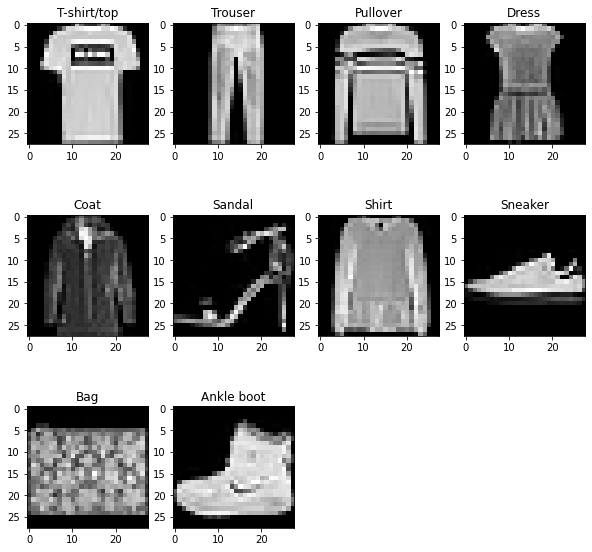

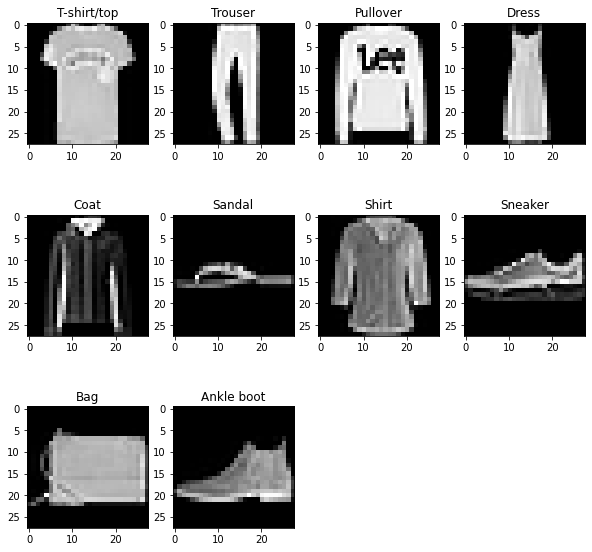

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.datasets import fashion_mnist
import tensorflow as tf
import tensorflow_datasets as tdfs
!pip install wandb
import wandb

# login to Weights & Biases
wandb.login()

# define class names mapping as a dictionary
class_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
               5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

class FashionMNIST:
    def __init__(self, X, Y):

        # create a list of indices for each class label
        self.index = [0] * 10
        for i in range(10):
            self.index[i] = np.where(Y == i)[0][0]
    
    def plot_samples(self, X, Y):
        # plot sample images for each class label
        plt.figure(figsize=(10, 10))
        for j, i in enumerate(self.index):
            plt.subplot(3, 4, j+1)
            plt.imshow(X[i], cmap=plt.get_cmap('gray'))
            plt.title(class_names[Y[i]])
        plt.show()
    
    def log_samples(self, X, Y):
        # log sample images to W&B
        wandb.log({'sample': [wandb.Image(X[i], caption=class_names[Y[i]]) for i in self.index]})

# initialize a new W&B project
wandb.init(project="Question_")
# For Train Data
fmnist = FashionMNIST(X_train, Y_train)
fmnist.plot_samples(X_train, Y_train)
fmnist.log_samples(X_train, Y_train)

# For Test Data
fmnist = FashionMNIST(X_test, Y_test)
fmnist.plot_samples(X_test, Y_test)
fmnist.log_samples(X_test, Y_test)